>>>Load dataest: ['CambridgeLandmarks'] Data root: ../data/datasets_original
Dataset: CambridgeLandmarks Scene: ['ShopFacade']

>>>>>>>>>


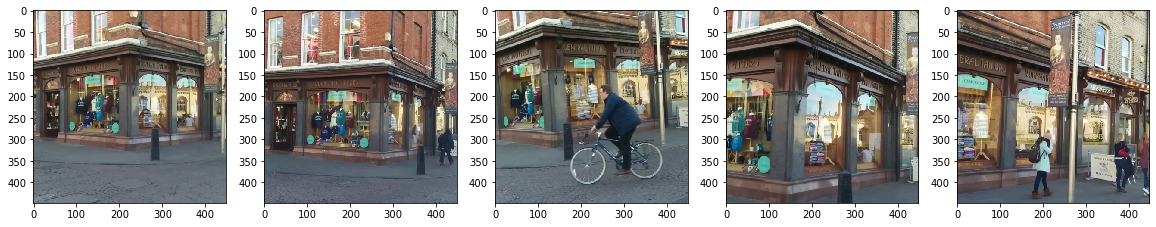

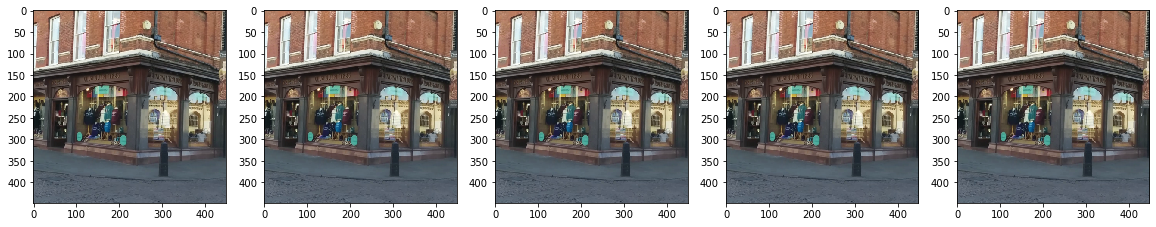

>>>>>>>>>


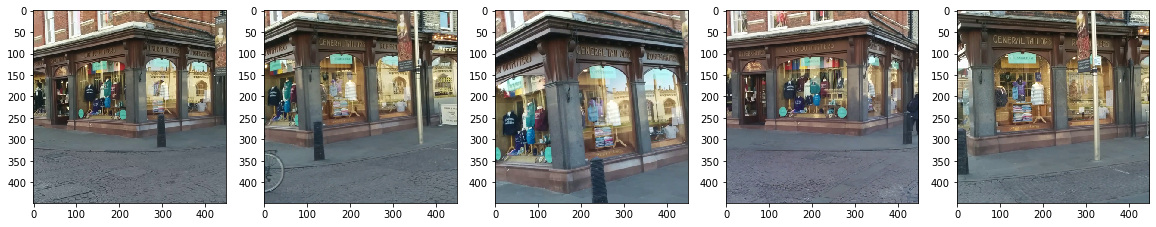

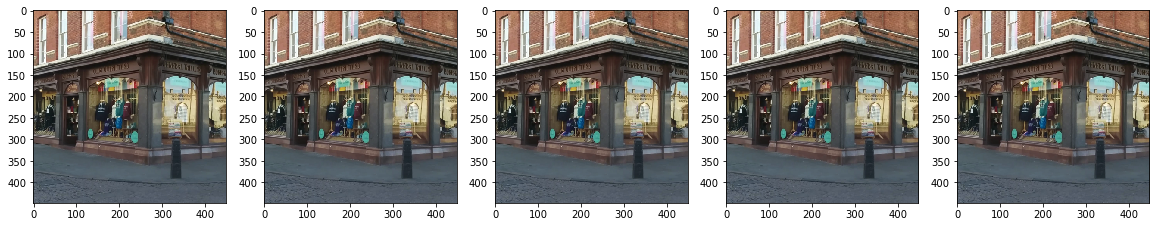

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import os
import torch
import torch.utils.data as data
from utils.common.plotting import plot_pair_loader
from utils.datasets.preprocess import get_pair_transform_ops
from utils.datasets.relapose import VisualLandmarkDataset, get_datasets

# Load all scenes of one dataset
data_root = '../data/datasets_original'
datasets = ['CambridgeLandmarks']
pair_txt = 'test_pairs.5nn.300cm50m.vlad.minmax.txt'
incl_sces = ['ShopFacade']
ops = get_pair_transform_ops(resize=480, crop_size=448, crop='center')
data_srcs = get_datasets(datasets, pair_txt,  data_root=data_root, incl_sces=incl_sces, ops=ops, 
                        train_lbl_txt=None, test_lbl_txt=None, with_ess=True)

dataset = data.ConcatDataset(data_srcs)
data_loader = data.DataLoader(dataset, batch_size=5, shuffle=False, num_workers=0)
plot_pair_loader(data_loader, row_max=1)